In [71]:
import pandas as pd
df = pd.read_csv('done_food_data.csv')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6894 non-null   int64  
 1   FoodGroup         6894 non-null   object 
 2   Descrip           6894 non-null   object 
 3   Energy_kcal       6894 non-null   int64  
 4   Protein_g         6894 non-null   float64
 5   Fat_g             6894 non-null   float64
 6   Carb_g            6894 non-null   float64
 7   Sugar_g           6894 non-null   float64
 8   Fiber_g           6894 non-null   float64
 9   VitA_mcg          6894 non-null   int64  
 10  VitB6_mg          6894 non-null   float64
 11  VitB12_mcg        6894 non-null   float64
 12  VitC_mg           6894 non-null   float64
 13  VitE_mg           6894 non-null   float64
 14  Folate_mcg        6894 non-null   int64  
 15  Niacin_mg         6894 non-null   float64
 16  Riboflavin_mg     6894 non-null   float64


In [77]:
df.columns

Index(['ID', 'FoodGroup', 'Descrip', 'Energy_kcal', 'Protein_g', 'Fat_g',
       'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg',
       'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg',
       'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg',
       'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg',
       'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA',
       'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA',
       'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA',
       'Selenium_USRDA', 'Zinc_USRDA', 'category'],
      dtype='object')

In [66]:
# Find duplicate rows in the entire dataset
duplicate_rows = df[df.duplicated()]
print(f'Total Duplicate Rows: {len(duplicate_rows)}')

Total Duplicate Rows: 0


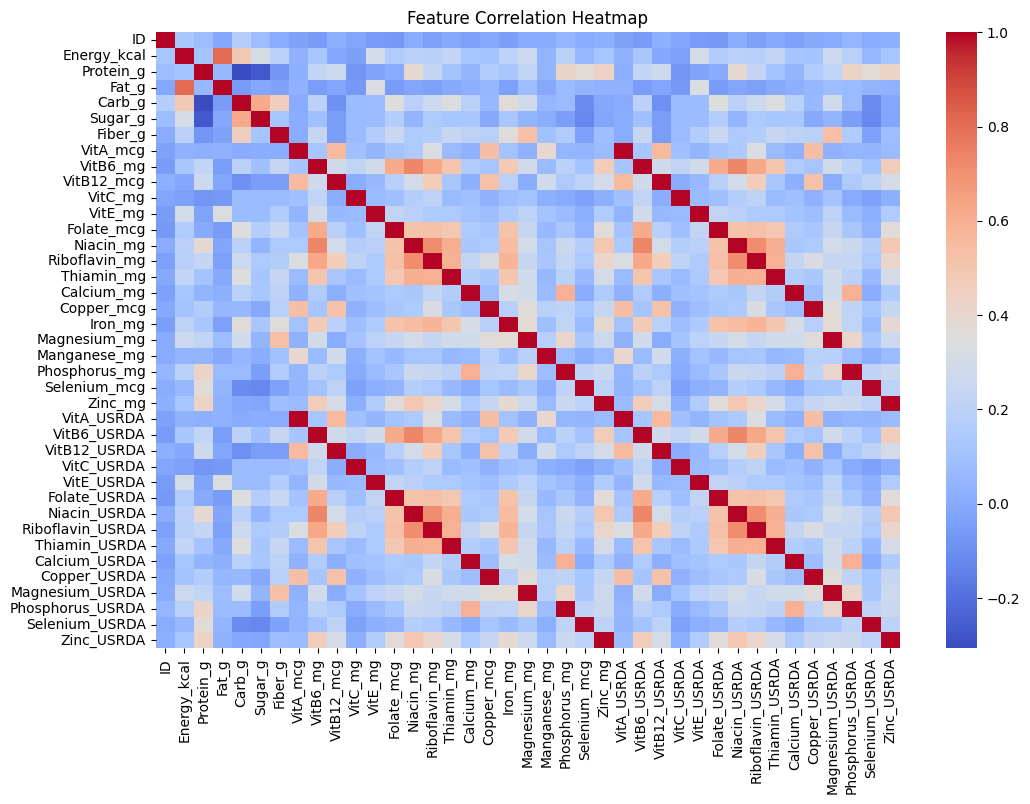

In [68]:
# Select only numeric columns for correlation computation
numeric_df = df.select_dtypes(include=['number'])  # Exclude object-type columns

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


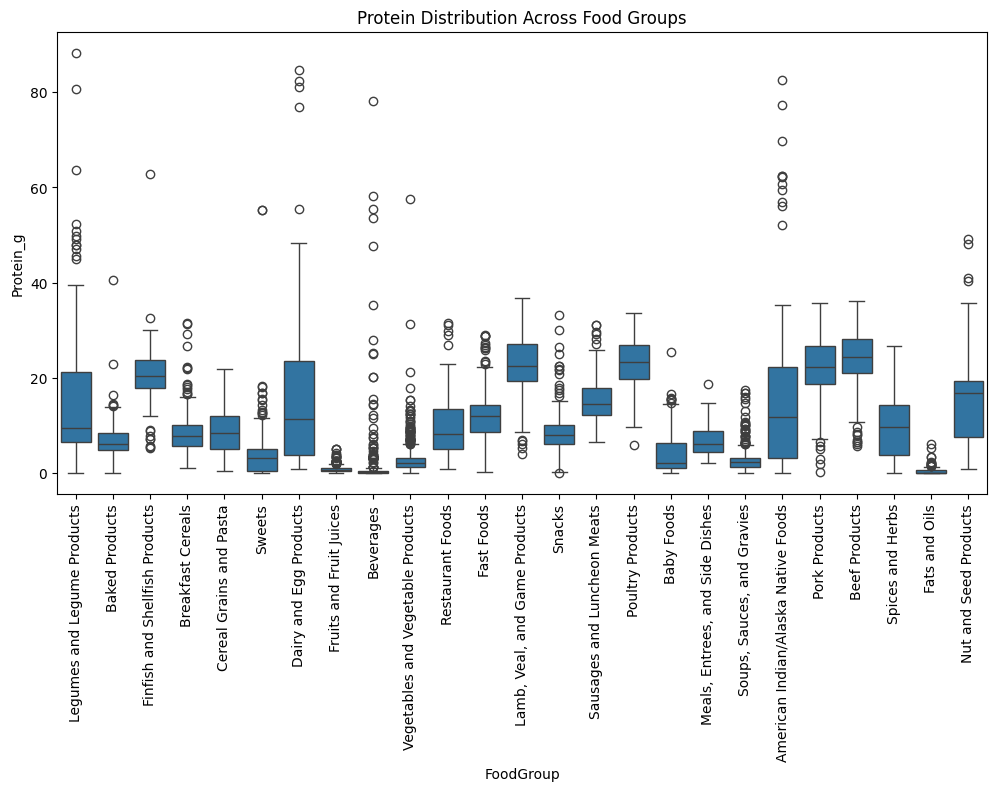

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['FoodGroup'], y=df['Protein_g'])
plt.xticks(rotation=90)
plt.title('Protein Distribution Across Food Groups')
plt.show()


k=3, mean distance to neighbors: 0.0834
k=5, mean distance to neighbors: 0.0994
k=7, mean distance to neighbors: 0.1124
k=10, mean distance to neighbors: 0.1284

Best k = 3 with lowest mean neighbor distance = 0.0834


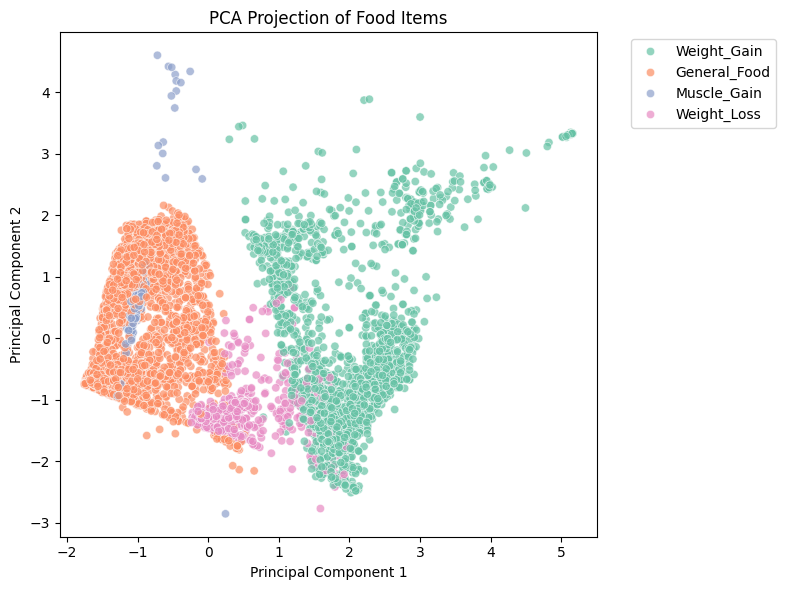

In [79]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("done_food_data.csv")

# Encode categorical column
label_encoder = LabelEncoder()
df["category_encoded"] = label_encoder.fit_transform(df["category"])

# Select features for modeling
features = ["Energy_kcal", "Protein_g", "Carb_g", "Fat_g", "category_encoded"]
X = df[features]

# Standardize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Tune n_neighbors manually and compute average distance
k_values = [3, 5, 7, 10]
k_scores = []

for k in k_values:
    model = NearestNeighbors(n_neighbors=k)
    model.fit(X_train)
    distances, _ = model.kneighbors(X_test)
    mean_distance = np.mean(distances)
    k_scores.append((k, mean_distance))
    print(f"k={k}, mean distance to neighbors: {mean_distance:.4f}")

# Find the best k (lowest mean distance)
best_k, best_score = min(k_scores, key=lambda x: x[1])
print(f"\nBest k = {best_k} with lowest mean neighbor distance = {best_score:.4f}")

# Fit final model with best k
final_model = NearestNeighbors(n_neighbors=best_k)
final_model.fit(X_scaled)

# Visualize data using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["category"], palette="Set2", alpha=0.7)
plt.title("PCA Projection of Food Items")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [80]:
# Example: User input (customize as needed)
user_input = pd.DataFrame([{
    "Energy_kcal": 250,
    "Protein_g": 20,
    "Carb_g": 30,
    "Fat_g": 10,
    "category_encoded": label_encoder.transform(["Weight_Loss"])[0]
}])

# Scale input
user_input_scaled = scaler.transform(user_input)

# Find nearest food items
distances, indices = final_model.kneighbors(user_input_scaled)
recommendations = df.iloc[indices[0]]

# Display results
print("Top food recommendations based on your input:")
print(recommendations[["Descrip", "FoodGroup", "Energy_kcal", "Protein_g", "Carb_g", "Fat_g", "category"]])


Top food recommendations based on your input:
                                                Descrip  \
4304  MORNINGSTAR FARMS Parmesan Garlic Wings, froze...   
5433  School Lunch Pizza, BIG DADDY'S LS 16" 51% Who...   
3849  MORNINGSTAR FARMS Chik'n Nuggets, frozen, unpr...   

                        FoodGroup  Energy_kcal  Protein_g  Carb_g  Fat_g  \
4304  Legumes and Legume Products          231      14.20   24.10   8.60   
5433                   Fast Foods          248      13.63   27.35   9.33   
3849  Legumes and Legume Products          235      14.40   21.80  10.00   

         category  
4304  Weight_Loss  
5433  Weight_Loss  
3849  Weight_Loss  
